<a href="https://colab.research.google.com/github/JanaAbdallah/Machine-Learning-Algorithms/blob/main/fcc_MAGIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

Dataset from UCI => Magic Gamma Telescope

In [ ]:
cols=["fLength","fWidth","fSize","fConc","fConcl","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df=pd.read_csv("magic04.data",names=cols)
df.head()

fLength    fWidth   fSize   fConc  fConcl     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

We gonna try to predict for future whether the class is G for Gamma or H for Hadron, we gonna pass features our inputs rows and we gonna tryp to predict the class "target" => this is classification , supervised learning

In [ ]:
df["class"] = df["class"].astype(str).str.strip()
df["class"] = (df["class"] == "g").astype(int)



In [ ]:
print(df["class"].value_counts())

class
1    12332
0     6688
Name: count, dtype: int64


In [ ]:
df.head()

fLength    fWidth   fSize   fConc  fConcl     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

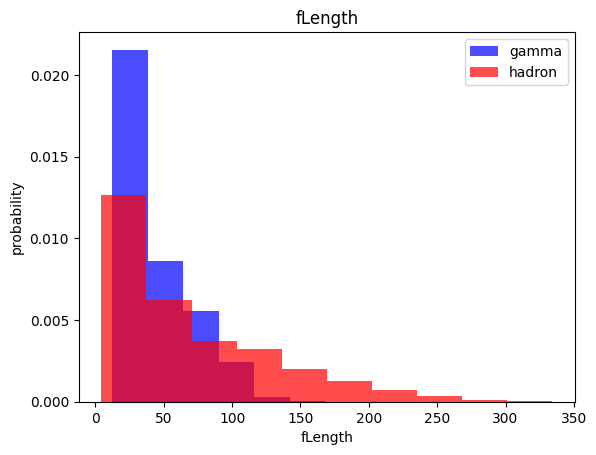

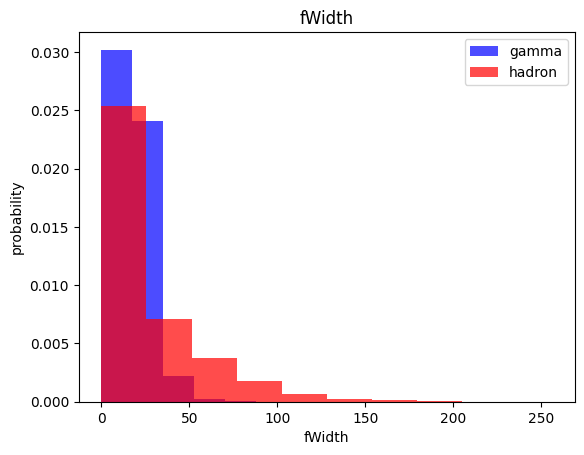

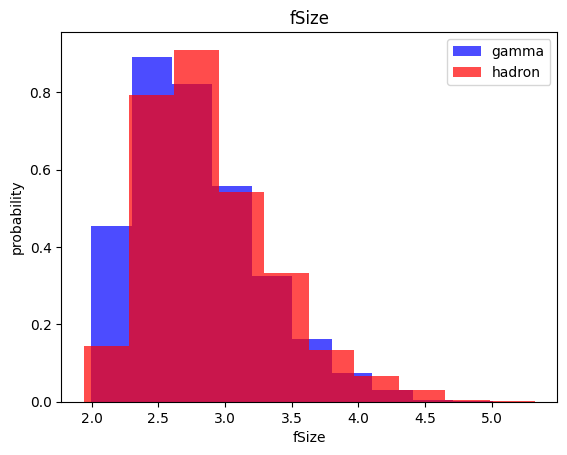

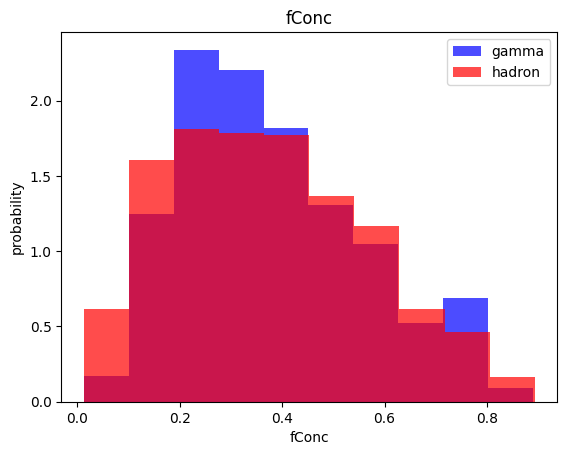

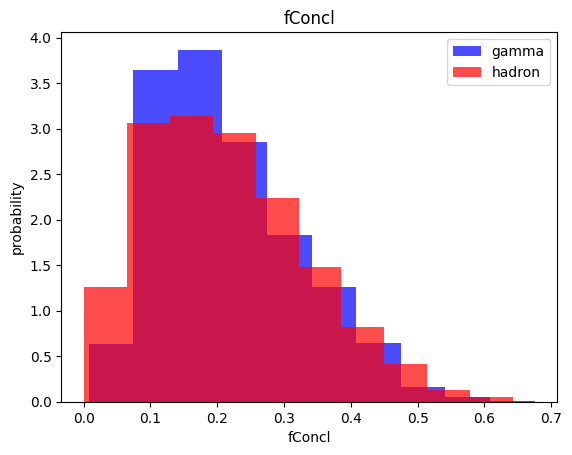

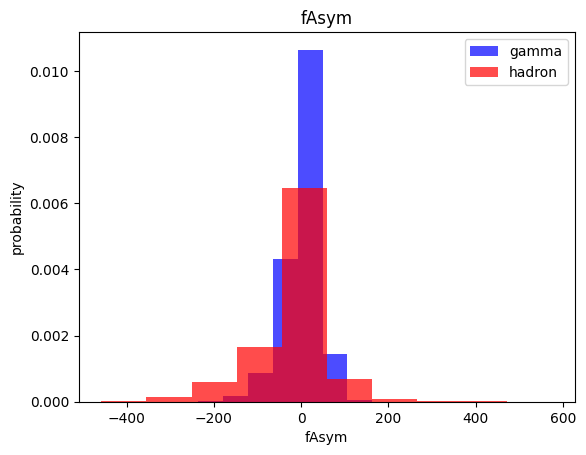

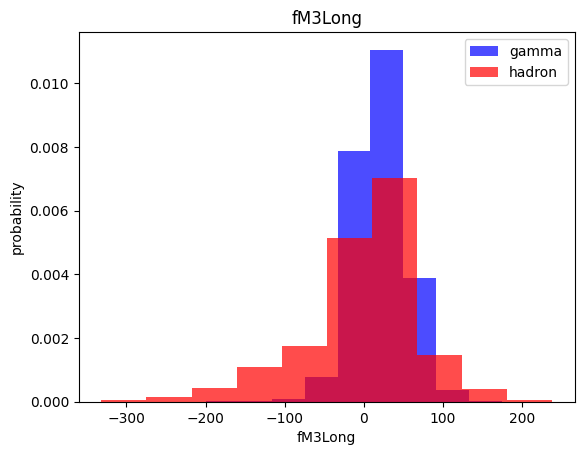

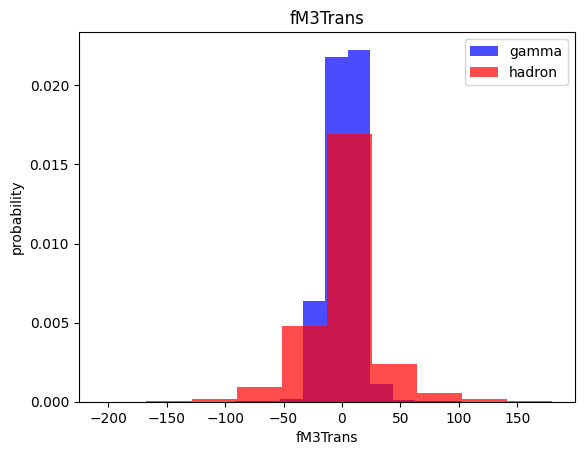

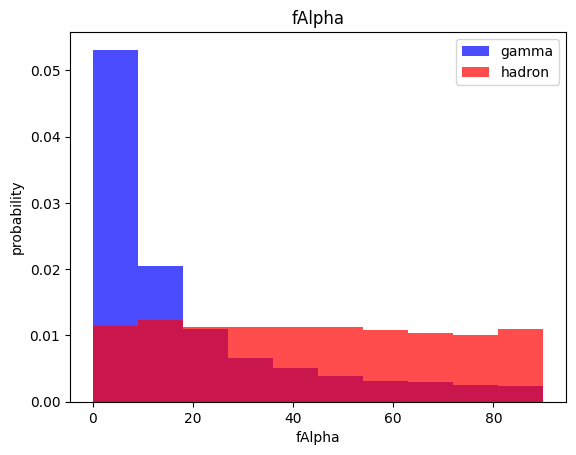

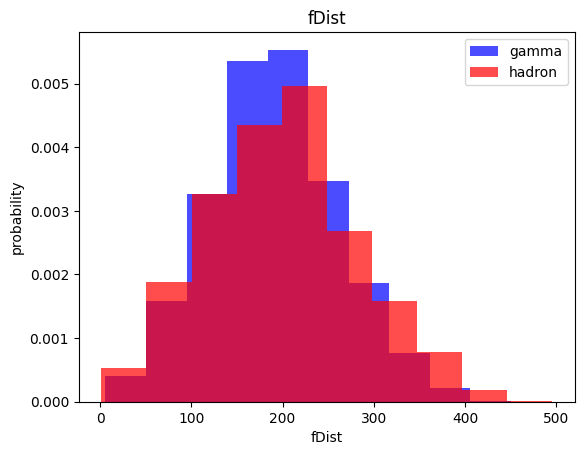

In [ ]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label], color='blue', label='gamma',alpha=0.7,density=True)  # got me all things => class = 0 "g"
  plt.hist(df[df["class"]==0][label], color='red', label='hadron',alpha=0.7,density=True)
  plt.title(label)
  plt.ylabel("probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [ ]:
train_df, valid_df, test_df = np.split(
    df.sample(frac=1, random_state=42),
    [int(0.6 * len(df)), int(0.8 * len(df))]
) # every thing before 60 % is for trainig , and evrything between 60 and 80 for valid and rest is for test

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
def scale_dataset(dataframe, oversample=False):
  X=dataframe[dataframe.columns[:-1]].values
  y=dataframe[dataframe.columns[-1]].values

  scaler=StandardScaler()
  X=scaler.fit_transform(X)

  if oversample:
    ros=RandomOverSampler()
    X,y=ros.fit_resample(X,y)

  data=np.hstack((X,np.reshape(y,(-1,1))))
  return data, X, y

In [ ]:
train_scaled, X_train, y_train = scale_dataset(train_df, oversample=True)
valid_scaled, X_valid, y_valid = scale_dataset(valid_df)
test_scaled, X_test, y_test = scale_dataset(test_df)


**KNN Implementation**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model=KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred=knn_model.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.73      0.72      1331
           1       0.85      0.85      0.85      2473

    accuracy                           0.80      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.80      0.81      3804



# accuracy is 82 % it gets 82 % right values ,
# precision out of all total how many we get right so here is 77 % => out of all total is 77 % of 0 and 84 %
# Recall how many items are right

**Logistic Regression Algorithm**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model=LogisticRegression(random_state=42)
lg_model.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [ ]:
y_pred=lg_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.71      0.69      1331
           1       0.84      0.81      0.82      2473

    accuracy                           0.77      3804
   macro avg       0.75      0.76      0.76      3804
weighted avg       0.78      0.77      0.78      3804

